<div style="line-height:0.5">
<h1 style="color:#E74C3C"> Data exploration 2 </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> fft + argrelextrema + pandas Series + pandas values.copy() + datetime
</span>
</div>
</div>

In [1]:
import csv
import warnings
import datetime
import numpy as np
import pandas as pd
from itertools import islice
from matplotlib import pyplot as plt
from pandas import Series as se
from pandas import DataFrame as da
from pandas.api.types import CategoricalDtype

from scipy import stats
from scipy.signal import argrelmax
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import find_peaks, peak_prominences, peak_widths, find_peaks_cwt, argrelextrema, argrelmin, argrelmax
from scipy.interpolate import BSpline

In [2]:
# Create a timestamp
print(f"Notebook last run was (end-to-end): {datetime.datetime.now()}")

Notebook last run was (end-to-end): 2023-09-13 12:32:10.575915


In [3]:
df_squeeze = pd.read_csv("./datasets_used/usable_squeeze.csv", header=None, skiprows=None, sep=',')
df_hug = pd.read_csv("./datasets_used/usable_hug.csv", header=None, skiprows=None, sep=',')
df_quiet = pd.read_csv("./datasets_used/real_quiet.csv", header=None, skiprows=None, sep=',')

df_squeeze[:5]
df_hug[:5]
df_quiet[:5]

,0,1,2,3
0,0.18,0.16,0.21,0.17
1,0.17,0.17,0.22,0.18
2,0.18,0.16,0.22,0.18
3,0.17,0.17,0.21,0.17
4,0.17,0.16,0.22,0.17


In [4]:
len(df_squeeze)

172

In [5]:
df_squeeze.columns=['scans0','scans1','scans2','scans3']
df_squeeze['scans0'].astype(float)
df_squeeze['scans1'].astype(float)
df_squeeze['scans2'].astype(float)
df_squeeze['scans3'].astype(float);

In [6]:
idx=4
arr = np.random.uniform(low=4, high=13, size=172)

if "Time" not in df_squeeze.columns:
    df_squeeze.insert(loc=idx, column='Time', value=arr)

df_squeeze.head()

,scans0,scans1,scans2,scans3,Time
0,0.17,0.18,0.23,0.17,9.525135
1,0.19,0.15,0.21,0.17,6.667224
2,0.27,0.70,0.39,0.77,4.362930
3,0.18,0.20,0.22,0.18,4.075664
4,0.18,0.14,0.22,0.15,12.017254


In [7]:
ciao2 = [[],[],[],[]]
ciao1 = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
for i in range(len(ciao1)):
    for j in range(len(ciao1[i])):
        ciao2[i].append(ciao1[i][j])
ciao2

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

In [8]:
means = []
stds = []
maxis = [] 
minis = []
mods = []
modes = []
peakss = []
num_of_peaks = []
inters = []
promi = []

In [9]:
df_df = df_squeeze[:30]
print(df_df)
pp, _ = find_peaks(df_df['scans0'])

    scans0  scans1  scans2  scans3       Time
0     0.17    0.18    0.23    0.17   9.525135
1     0.19    0.15    0.21    0.17   6.667224
2     0.27    0.70    0.39    0.77   4.362930
3     0.18    0.20    0.22    0.18   4.075664
4     0.18    0.14    0.22    0.15  12.017254
5     0.19    0.15    0.23    0.16  11.109216
6     0.41    0.22    0.37    0.22  12.148673
7     0.45    0.23    0.56    0.27   4.348818
8     0.15    0.16    0.20    0.19   8.733516
9     0.18    0.16    0.21    0.18  11.880900
10    0.35    0.66    0.81    0.33   7.806062
11    0.20    0.20    0.29    0.21   5.150702
12    0.17    0.15    0.19    0.19  10.405061
13    0.33    0.55    0.50    0.34  11.259103
14    0.31    0.54    0.50    0.30  12.833467
15    0.16    0.14    0.17    0.18   4.805023
16    0.26    0.31    0.38    0.21   7.498259
17    0.35    0.69    0.83    0.34  10.927505
18    0.18    0.14    0.22    0.19   8.578674
19    0.42    0.77    0.86    0.36   5.450653
20    0.25    0.31    0.38    0.22

In [10]:
df_poco = df_df.iloc[:, :-1]
df_poco

,scans0,scans1,scans2,scans3
0,0.17,0.18,0.23,0.17
1,0.19,0.15,0.21,0.17
2,0.27,0.70,0.39,0.77
3,0.18,0.20,0.22,0.18
4,0.18,0.14,0.22,0.15
5,0.19,0.15,0.23,0.16
6,0.41,0.22,0.37,0.22
7,0.45,0.23,0.56,0.27
8,0.15,0.16,0.20,0.19
9,0.18,0.16,0.21,0.18


In [11]:
for column in df_poco:
    means.append(df_poco[column].mean().round(3))
    stds.append(df_poco[column].std())
    maxis.append(df_poco[column].max())
    minis.append(df_poco[column].min())
    mods.append(stats.mode(df_poco[column]))
    pp = (find_peaks_cwt(df_poco[column], 2))
    prominences = peak_prominences(df_poco[column], pp)[0]
    peakss.append(pp)
    promi.append(prominences)
    peakss.append(find_peaks(df_squeeze[column], threshold=0.2))
print(pp)

[ 2 13 19 28]


/tmp/ipykernel_245833/3100018655.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mods.append(stats.mode(df_poco[column]))
/tmp/ipykernel_245833/3100018655.py:8: PeakPropertyWarning: some peaks have a prominence of 0
  prominences = peak_prominences(df_poco[column], pp)[0]


In [12]:
peakss

[array([ 2,  7, 14, 19, 28]),
 (array([ 28, 108, 111, 117, 120, 123, 125]),
  {'left_thresholds': array([0.22, 0.3 , 0.58, 0.76, 0.85, 0.96, 1.04]),
   'right_thresholds': array([0.2 , 0.33, 0.34, 0.47, 0.74, 1.17, 0.79])}),
 array([ 2, 11, 14, 19, 28]),
 (array([  2,  10,  17,  19,  23,  28,  31, 139, 141, 144, 148]),
  {'left_thresholds': array([0.55, 0.5 , 0.38, 0.63, 0.58, 0.66, 0.22, 0.68, 0.6 , 0.48, 0.43]),
   'right_thresholds': array([0.5 , 0.46, 0.55, 0.46, 0.6 , 0.6 , 0.49, 0.7 , 0.22, 0.69, 0.66])}),
 array([ 2,  7, 10, 19, 28]),
 (array([10, 17, 19, 23, 28, 31, 76, 80, 83, 85, 88, 95]),
  {'left_thresholds': array([0.6 , 0.45, 0.64, 0.52, 0.6 , 0.26, 0.96, 0.78, 0.26, 0.73, 0.7 ,
          0.59]),
   'right_thresholds': array([0.52, 0.61, 0.48, 0.55, 0.57, 0.42, 0.78, 0.86, 0.66, 0.28, 1.  ,
          0.49])}),
 array([ 2, 13, 19, 28]),
 (array([ 2, 37, 41, 48, 55, 59, 63, 70]),
  {'left_thresholds': array([0.6 , 0.3 , 0.62, 0.9 , 0.87, 0.39, 0.79, 0.59]),
   'right_thresh

In [13]:
print(peakss[3])

(array([  2,  10,  17,  19,  23,  28,  31, 139, 141, 144, 148]), {'left_thresholds': array([0.55, 0.5 , 0.38, 0.63, 0.58, 0.66, 0.22, 0.68, 0.6 , 0.48, 0.43]), 'right_thresholds': array([0.5 , 0.46, 0.55, 0.46, 0.6 , 0.6 , 0.49, 0.7 , 0.22, 0.69, 0.66])})


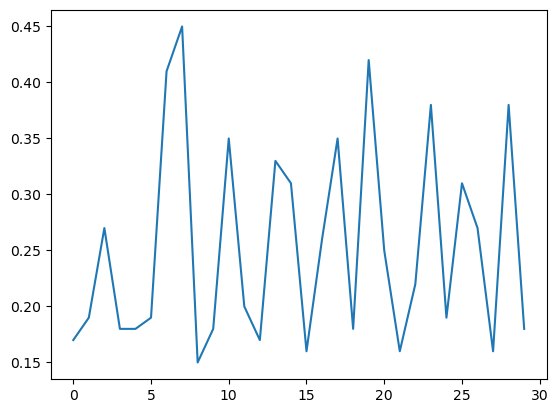

In [14]:
plt.plot(df_poco['scans0'])
plt.show()

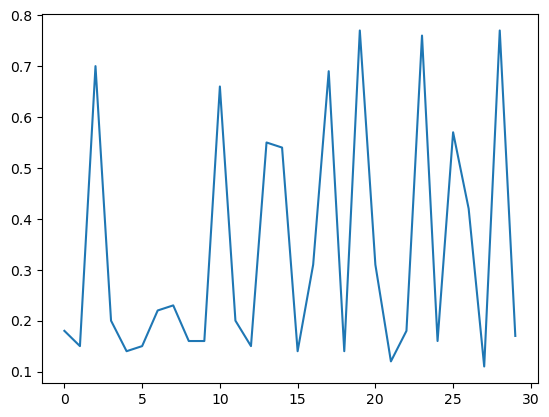

In [15]:
plt.plot(df_poco.scans1)
plt.show()

In [16]:
df_q = df_quiet.rename(columns={0: "scans_sens0", 1: "scans_sens1", 2: "scans_sens2", 3: "scans_sens3"})
df_q = df_q[:30]
df_q

,scans_sens0,scans_sens1,scans_sens2,scans_sens3
0,0.18,0.16,0.21,0.17
1,0.17,0.17,0.22,0.18
2,0.18,0.16,0.22,0.18
3,0.17,0.17,0.21,0.17
4,0.17,0.16,0.22,0.17
5,0.18,0.17,0.22,0.17
6,0.17,0.16,0.21,0.17
7,0.17,0.16,0.21,0.18
8,0.17,0.17,0.22,0.18
9,0.17,0.16,0.21,0.18


(array([ 2,  7, 10, 13, 17, 19, 23, 25, 28]),)


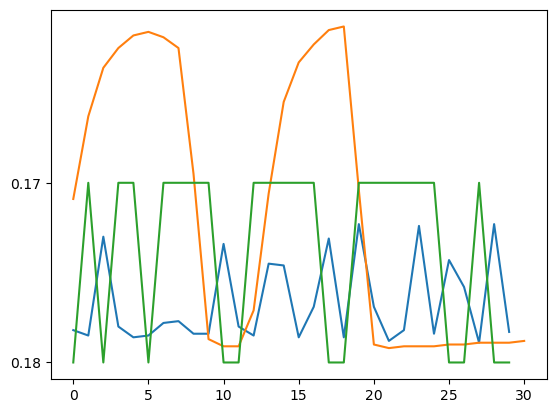

In [17]:
ar_scans1 = np.array(df_poco.scans1, dtype=float)
plt.plot(ar_scans1)
plt.plot(df_hug[0])
plt.plot(df_q.scans_sens0)
sad = argrelmax(ar_scans1)
print(sad)

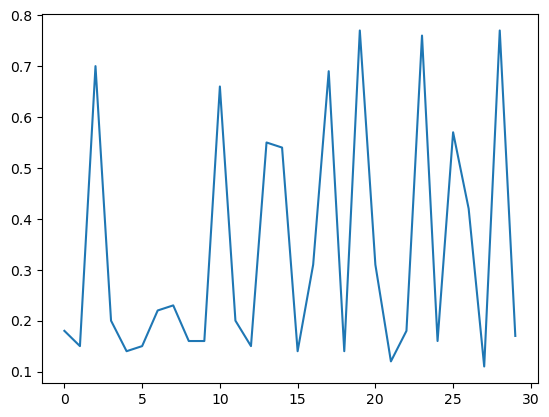

In [18]:
ar_scans1 = np.array(df_poco.scans1, dtype=float)
plt.plot(ar_scans1)
plt.show()

In [19]:
df_q

,scans_sens0,scans_sens1,scans_sens2,scans_sens3
0,0.18,0.16,0.21,0.17
1,0.17,0.17,0.22,0.18
2,0.18,0.16,0.22,0.18
3,0.17,0.17,0.21,0.17
4,0.17,0.16,0.22,0.17
5,0.18,0.17,0.22,0.17
6,0.17,0.16,0.21,0.17
7,0.17,0.16,0.21,0.18
8,0.17,0.17,0.22,0.18
9,0.17,0.16,0.21,0.18


In [20]:
print(df_q["scans_sens0"].dtype)
print(df_q["scans_sens1"].dtype)
print(df_q["scans_sens2"].dtype)
print(df_q["scans_sens3"].dtype)


object
float64
float64
float64


In [21]:
ar_scans1 = np.array(df_poco.scans1)
ar_scans3 = np.array(df_poco.scans3)
arra = ar_scans1 - np.mean(ar_scans1)
arrad = df_hug[0] - np.mean(df_hug[0])


scans_sens0_values = pd.to_numeric(df_q.scans_sens0.str.split().str.join(""), errors="coerce")


df_q["scans_sens0"] = df_q["scans_sens0"].astype(float)
print(df_q["scans_sens0"].dtype)
arrar = df_q.scans_sens1 - np.mean(df_q.scans_sens0)

## Calculate the difference between scans_sens1 and scans_sens0_mean
diff = df_q.scans_sens1.values - df_q.scans_sens0.mean()

## Do something with the diff
print(diff)

float64
[-0.01366667 -0.00366667 -0.01366667 -0.00366667 -0.01366667 -0.00366667
 -0.01366667 -0.01366667 -0.00366667 -0.01366667 -0.01366667 -0.01366667
 -0.00366667 -0.01366667 -0.00366667 -0.00366667 -0.01366667 -0.01366667
 -0.00366667 -0.01366667 -0.01366667 -0.00366667 -0.01366667 -0.01366667
 -0.00366667 -0.00366667 -0.00366667 -0.00366667 -0.01366667 -0.01366667]


In [22]:
df_hug = df_hug.rename(columns={0: "scans_sens0", 1: "scans_sens1", 2: "scans_sens2", 3: "scans_sens3"})
df_hug["scans_sens0"]

0     0.91
1     1.37
2     1.64
3     1.75
4     1.82
5     1.84
6     1.81
7     1.75
8     1.05
9     0.13
10    0.09
11    0.09
12    0.29
13    0.94
14    1.45
15    1.67
16    1.77
17    1.85
18    1.87
19    0.96
20    0.10
21    0.08
22    0.09
23    0.09
24    0.09
25    0.10
26    0.10
27    0.11
28    0.11
29    0.11
30    0.12
Name: scans_sens0, dtype: float64

<h2 style="color:#E74C3C"> <u>Discrete Fourier transormations </u></h2>

<h3 style="color:#E74C3C"> Recap: </h3>    
<div style="margin-top: -20px;">
Using scipy's fft function on numpy arrays may lead to errors related to the `ALIGNED` flag. <br>
This error can occur when the input array is not aligned, which means that the memory blocks of the array are not contiguous.  <br>
This can happen if the array is a view of another array, or if it was created through a concatenation or a slicing operation.


In [23]:
""" Copy arrays to apply the Fast Fourier Transform (FFT). """
aa = df_hug["scans_sens0"].values.copy()
bb = df_hug["scans_sens1"].values.copy()
cc = df_q["scans_sens1"].values.copy()
dd = df_poco["scans1"].values.copy()
x_copy3 = np.copy(aa)
x_copy4 = np.copy(bb)
x_copy5 = np.copy(arrad)
x_copy6 = np.copy(cc)
x_copy7 = np.copy(dd)
x_copy8 = np.copy(arrar)

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


30
[0.00000000e+00 1.57585907e+00 4.99241837e-01 8.45786020e-04
 8.73017332e-01 1.23700000e-01 1.13810556e+00 2.26933131e+00
 2.11809167e+00 1.43595421e+00 6.98290000e+00 4.02355322e-01
 5.62094444e-01 2.20925429e+00 4.06624916e+00 4.90000000e-03
 4.06624916e+00 2.20925429e+00 5.62094444e-01 4.02355322e-01
 6.98290000e+00 1.43595421e+00 2.11809167e+00 2.26933131e+00
 1.13810556e+00 1.23700000e-01 8.73017332e-01 8.45786020e-04
 4.99241837e-01 1.57585907e+00]


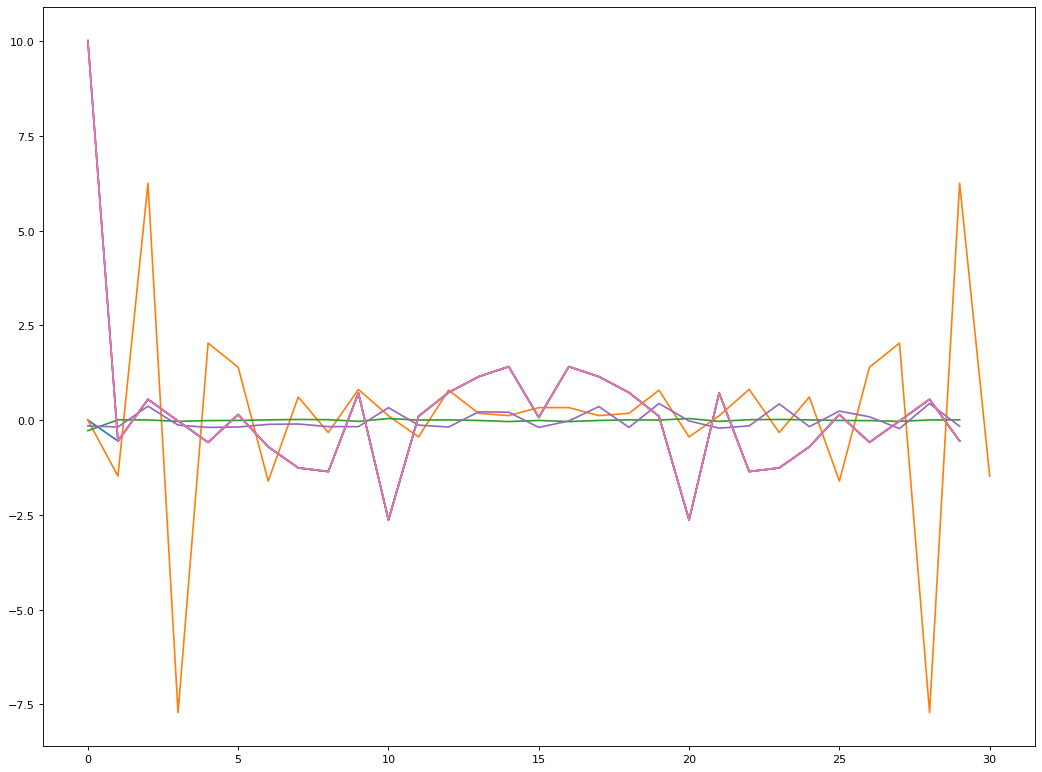

In [24]:
y1 = fft(arra)
y2 = fft(ar_scans1)
y3 = fft(x_copy3)
y4 = fft(x_copy4)
y5 = fft(x_copy5)
y6 = fft(x_copy6)
ydf = fft(x_copy7)
y7 = fft(x_copy8)

yinv1 = ifft(y1)

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='g')

plt.plot(y1)
plt.plot(y5)

plt.plot(y7)
plt.plot(y2)
plt.plot(yinv1)
plt.plot(y2)
print(len(df_poco.scans1))

plt.plot(ydf)

signalP = np.abs(y1) ** 2
print(signalP)

<h3 style="color:#E74C3C"> => Sin transormations </h3>

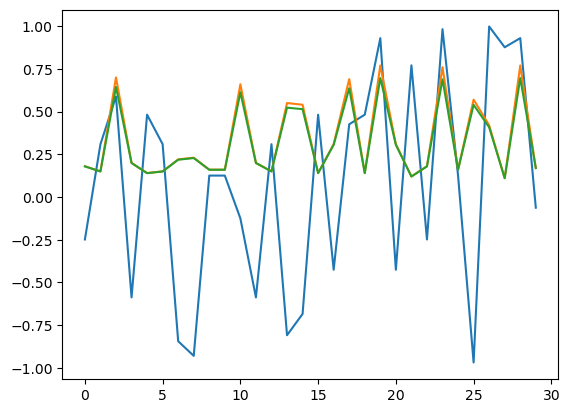

In [25]:
f = 3
# = 100.0
si = np.sin(ar_scans1)
s = np.sin(2*np.pi*f*ar_scans1)
plt.plot(s)
plt.plot(ar_scans1)
plt.plot(si)
plt.show()

<h3 style="color:#E74C3C"> => Find peaks </h3>

In [26]:
data = np.sin(ar_scans1)
peakind = find_peaks_cwt(data, np.arange(1,1000))
peakind, ar_scans1[peakind], data[peakind]

(array([23]), array([0.76]), array([0.68892145]))

[0.44969092 0.37755118 1.22568316 0.49679741 0.35315211 0.37755118
 0.54301849 0.56577193 0.40178111 0.40178111 1.20680273 0.49679741
 0.37755118 1.11674997 1.10580902 0.35315211 0.73797267 1.22165317
 0.35315211 1.24121323 0.73797267 0.30388982 0.44969092 1.24033472
 0.40178111 1.13726817 0.94029052 0.27904848 1.24121323 0.42583122]
[1.08180036 1.85802822 1.13136145 1.97652316 1.39780451 1.38234256
 1.15057317 1.75825019 0.92372266]
[ 2.83014362  2.85356665 11.          2.96758274  3.          2.88651409
  5.96243231  2.81439076  1.84744532]


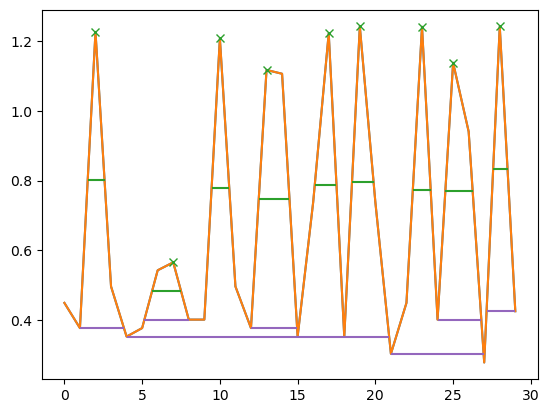

In [27]:
xa = np.sin(ar_scans1) + 0.6 * np.sin(2.6 * ar_scans1)
plt.plot(xa)
print(xa)
peaks1, _ = find_peaks(xa)
results_half = peak_widths(xa, peaks1, rel_height=0.5)
print(results_half[0])  # widths


results_full = peak_widths(xa, peaks1, rel_height=1)
print(results_full[0])  # widths

plt.plot(xa)
plt.plot(peaks1, xa[peaks1], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C4")
plt.show()

<h3 style="color:#E74C3C"> => Fourier transformations for sample frequencies </h3>

[ 0.          0.06666667  0.13333333  0.2         0.26666667  0.33333333
  0.4         0.46666667  0.53333333  0.6         0.66666667  0.73333333
  0.8         0.86666667  0.93333333 -1.         -0.93333333 -0.86666667
 -0.8        -0.73333333 -0.66666667 -0.6        -0.53333333 -0.46666667
 -0.4        -0.33333333 -0.26666667 -0.2        -0.13333333 -0.06666667]
[ 0.          0.06666667  0.13333333  0.2         0.26666667  0.33333333
  0.4         0.46666667  0.53333333  0.6         0.66666667  0.73333333
  0.8         0.86666667  0.93333333 -1.         -0.93333333 -0.86666667
 -0.8        -0.73333333 -0.66666667 -0.6        -0.53333333 -0.46666667
 -0.4        -0.33333333 -0.26666667 -0.2        -0.13333333 -0.06666667]
[ 0.          0.01666667  0.03333333  0.05        0.06666667  0.08333333
  0.1         0.11666667  0.13333333  0.15        0.16666667  0.18333333
  0.2         0.21666667  0.23333333  0.25        0.26666667  0.28333333
  0.3         0.31666667  0.33333333  0.35       

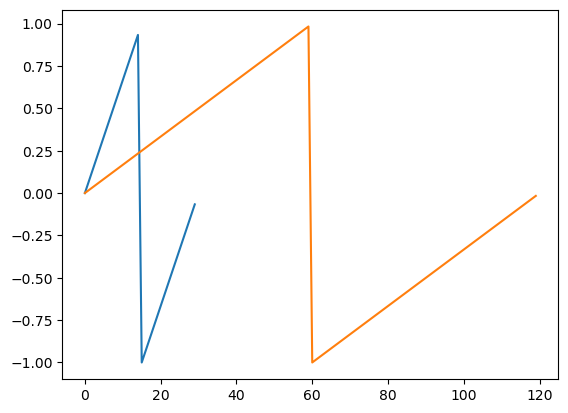

In [28]:
timestep = 0.5
n1 = ar_scans1.size
n2 = ar_scans3.size
n3 = df_poco.size
f1 = np.fft.fftfreq(n1, d=timestep)
f2 = np.fft.fftfreq(n2, d=timestep)
f3 = np.fft.fftfreq(n3, d=timestep)
print(f1)
print(f2)
print(f3)

plt.plot(f1)
plt.plot(f3)
plt.show()

<h2 style="color:#E74C3C"> <u> One-dimensional polynomials </u></h2>

      29        28       27       26        25        24        23
0.18 x  + 0.15 x  + 0.7 x  + 0.2 x  + 0.14 x  + 0.15 x  + 0.22 x 
         22        21        20        19       18        17        16
 + 0.23 x  + 0.16 x  + 0.16 x  + 0.66 x  + 0.2 x  + 0.15 x  + 0.55 x 
         15        14        13        12        11        10        9
 + 0.54 x  + 0.14 x  + 0.31 x  + 0.69 x  + 0.14 x  + 0.77 x  + 0.31 x
         8        7        6        5        4        3        2
 + 0.12 x + 0.18 x + 0.76 x + 0.16 x + 0.57 x + 0.42 x + 0.11 x + 0.77 x + 0.17


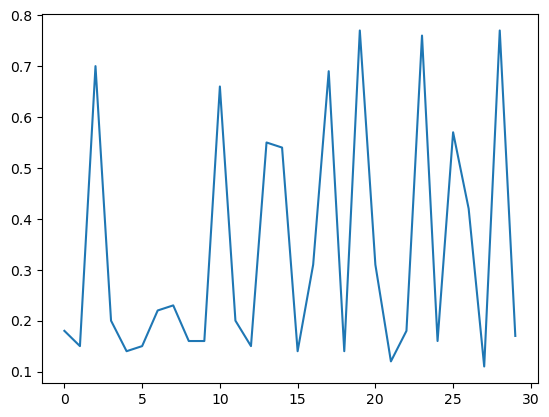

In [29]:
p = np.poly1d(df_poco.scans1)
print(p)
plt.plot(p)
plt.show()

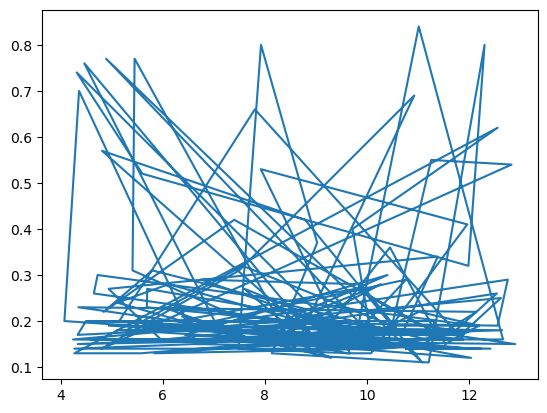

In [30]:
plt.plot(df_squeeze.Time,df_squeeze.scans1)
plt.show()

In [31]:
peakss[0], promi[2]

(array([ 2,  7, 14, 19, 28]), array([0.17, 0.35, 0.61, 0.69, 0.57]))

In [32]:
max_promi = []
for i in promi[0]:
    max_promi.append(max(promi[0]))
max_promi

[0.28, 0.28, 0.28, 0.28, 0.28]

In [33]:
'''others'''
modes = mods[0].mode
modes
maxis

[0.45, 0.77, 0.86, 0.77]

In [34]:
''' Find peaks.
N.B.
with a big matrix it is better to use: => peakss.append(find_peaks(df_squeeze[column], threshold=0.2))
num_peaks1 = peakss[0][0].size
print(num_peaks1,peakss[0][0])
'''
num_peaks_A1 = peakss[0].size
num_peaks_A2 = peakss[1][0].size
num_peaks_A3 = peakss[2].size
num_peaks_A4 = peakss[3][0].size


num_peaks_arr = []
num_peaks_arr.append(num_peaks_A1)
num_peaks_arr.append(num_peaks_A2)
num_peaks_arr.append(num_peaks_A3)
num_peaks_arr.append(num_peaks_A4)
print("array with total num of peaks is:: {}".format(num_peaks_arr))

array with total num of peaks is:: [5, 7, 5, 11]


<h2 style="color:#E74C3C"> <u> BSpline </u></h2>

In [35]:
def B(x, k, i, t):
    """ Calculate the basis function for a B-spline at a given point.\\
    The B-spline basis function is recursively defined.

    Parameters:
        - x = Evaluation point [float]
        - k = Degree of the B-spline [(nt]
        - i = Index of the basis function [int]
        - t = Knot vector specifying the breakpoints [list]

    Returns:
        Value of the B-spline basis function at the given point [float]
    """
    # Base case: If degree k is 0, return 1.0 if x is within the i-th segment, else return 0.0
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    # Calculate the first term of the recursive definition
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    # Calculate the second term of the recursive definition
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)    
    
    # Combine the two terms to get the final value of the B-spline basis function
    return c1 + c2


def bspline(x, t, c, k):
    """ Evaluate a B-spline curve at a given point.\\
    The B-spline curve is defined by control points 'c', knot vector 't', and degree 'k'.

    Parameters:
        - x => The evaluation point on the B-spline curve [float]
        - t => The knot vector specifying the breakpoints [list]
        - c => The control points of the B-spline curve [list]
        - k => The degree of the B-spline [int]

    Returns:
    float: The value of the B-spline curve at the given point.
    """
    n = len(t) - k - 1
    # Calculate the number of control points and ensure the input is valid
    assert (n >= k+1) and (len(c) >= n)
    
    # Evaluate the B-spline curve at the given point by summing contributions from each control point
    return sum(c[i] * B(x, k, i, t) for i in range(n))


In [36]:
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
spl = BSpline(t, df_poco['scans1'], k)
spl(2.5)
bspline(2.5, t, df_poco['scans1'], k)

0.22249999999999998

<h3 style="color:#E74C3C"> => Least squares polynomial fit </h3>

[ 2.47631360e-14 -4.34741799e-14  2.42064216e-14  1.00000000e+00
  2.98979646e-16]


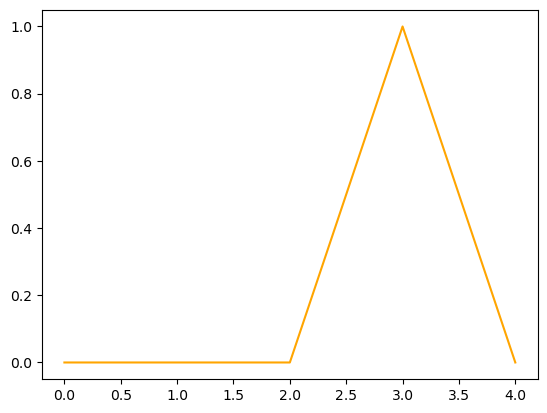

In [37]:
z = np.polyfit(df_poco.scans1, df_poco.scans1, 4)
z
print(z)
plt.plot(z, color='orange')
plt.show()